In [1]:
from pandas import read_csv

In [2]:
# from https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=demo_r_mwk_05
data = read_csv('code/croatia_excess_deaths/data/demo_r_mwk_05_1_Data.csv')

In [3]:
data

,TIME,GEO,AGE,SEX,UNIT,Value,Flag and Footnotes
0,2000W01,Croatia,Total,Total,Number,"1,069",NaN
1,2000W01,Croatia,Total,Males,Number,514,NaN
2,2000W01,Croatia,Total,Females,Number,555,NaN
3,2000W01,Croatia,Less than 5 years,Total,Number,6,NaN
4,2000W01,Croatia,Less than 5 years,Males,Number,3,NaN
...,...,...,...,...,...,...,...
73201,2022W13,Croatia,90 years or over,Males,Number,:,NaN
73202,2022W13,Croatia,90 years or over,Females,Number,:,NaN
73203,2022W13,Croatia,Unknown,Total,Number,:,NaN
73204,2022W13,Croatia,Unknown,Males,Number,:,NaN


In [4]:
age_groups = sorted(set(data.AGE.to_list()))
age_groups

['90 years or over',
 'From 10 to 14 years',
 'From 15 to 19 years',
 'From 20 to 24 years',
 'From 25 to 29 years',
 'From 30 to 34 years',
 'From 35 to 39 years',
 'From 40 to 44 years',
 'From 45 to 49 years',
 'From 5 to 9 years',
 'From 50 to 54 years',
 'From 55 to 59 years',
 'From 60 to 64 years',
 'From 65 to 69 years',
 'From 70 to 74 years',
 'From 75 to 79 years',
 'From 80 to 84 years',
 'From 85 to 89 years',
 'Less than 5 years',
 'Total',
 'Unknown']

In [5]:
sorted_age_groups = [age_groups[18], age_groups[9]] + age_groups[1:8] + age_groups[10:18] + [age_groups[0], age_groups[19]]

In [6]:
sorted_age_groups

['Less than 5 years',
 'From 5 to 9 years',
 'From 10 to 14 years',
 'From 15 to 19 years',
 'From 20 to 24 years',
 'From 25 to 29 years',
 'From 30 to 34 years',
 'From 35 to 39 years',
 'From 40 to 44 years',
 'From 50 to 54 years',
 'From 55 to 59 years',
 'From 60 to 64 years',
 'From 65 to 69 years',
 'From 70 to 74 years',
 'From 75 to 79 years',
 'From 80 to 84 years',
 'From 85 to 89 years',
 '90 years or over',
 'Total']

In [7]:
data_all_age = data[(data.AGE == 'Total') & (data.SEX == 'Total')]

In [8]:
data_all_age

,TIME,GEO,AGE,SEX,UNIT,Value,Flag and Footnotes
0,2000W01,Croatia,Total,Total,Number,"1,069",NaN
63,2000W02,Croatia,Total,Total,Number,"1,160",NaN
126,2000W03,Croatia,Total,Total,Number,"1,164",NaN
189,2000W04,Croatia,Total,Total,Number,"1,270",NaN
252,2000W05,Croatia,Total,Total,Number,"1,328",NaN
...,...,...,...,...,...,...,...
72891,2022W09,Croatia,Total,Total,Number,:,NaN
72954,2022W10,Croatia,Total,Total,Number,:,NaN
73017,2022W11,Croatia,Total,Total,Number,:,NaN
73080,2022W12,Croatia,Total,Total,Number,:,NaN


In [9]:
data_all_age_2015_2019 = data_all_age[(data_all_age.TIME >= '2015W01') & (data_all_age.TIME < '2020W01')]

In [10]:
data_all_age_2015_2019

,TIME,GEO,AGE,SEX,UNIT,Value,Flag and Footnotes
49266,2015W01,Croatia,Total,Total,Number,"1,177",NaN
49329,2015W02,Croatia,Total,Total,Number,"1,254",NaN
49392,2015W03,Croatia,Total,Total,Number,"1,276",NaN
49455,2015W04,Croatia,Total,Total,Number,"1,231",NaN
49518,2015W05,Croatia,Total,Total,Number,"1,215",NaN
...,...,...,...,...,...,...,...
65394,2019W48,Croatia,Total,Total,Number,915,NaN
65457,2019W49,Croatia,Total,Total,Number,989,NaN
65520,2019W50,Croatia,Total,Total,Number,"1,021",NaN
65583,2019W51,Croatia,Total,Total,Number,"1,048",NaN


In [11]:
data_all_age_2020 = data_all_age[(data_all_age.TIME >= '2020W01') & (data_all_age.TIME < '2021W01')]
data_all_age_2021 = data_all_age[(data_all_age.TIME >= '2021W01') & (data_all_age.TIME < '2022W01')]
data_all_age_2022 = data_all_age[(data_all_age.TIME >= '2022W01') & (data_all_age.TIME < '2023W01')]

In [12]:
import numpy as np

week_avgs = []
week_stds = []

for week in range(1, 53):
    current_week = data_all_age_2015_2019[data_all_age_2015_2019.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
    
    current_vals = np.asarray([int(x.replace(',', '')) for x in current_week.Value.to_list()])
        
    week_avgs.append(current_vals.mean())
    week_stds.append(current_vals.std())
    
week_avgs = np.asarray(week_avgs)
week_stds = np.asarray(week_stds)

In [13]:
per_week_2020 = []
per_week_2021 = []
per_week_2022 = []

for week in range(1, 53):
    current_week_2020 = data_all_age_2020[data_all_age_2020.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
    current_week_2021 = data_all_age_2021[data_all_age_2021.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
    current_week_2022 = data_all_age_2022[data_all_age_2022.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
    
    per_week_2020.append(int(current_week_2020.Value.iat[0].replace(',', '')))
    per_week_2021.append(int(current_week_2021.Value.iat[0].replace(',', '')))
    
    try:
        per_week_2022.append(int(current_week_2022.Value.iat[0].replace(',', '')))
    except:
        pass

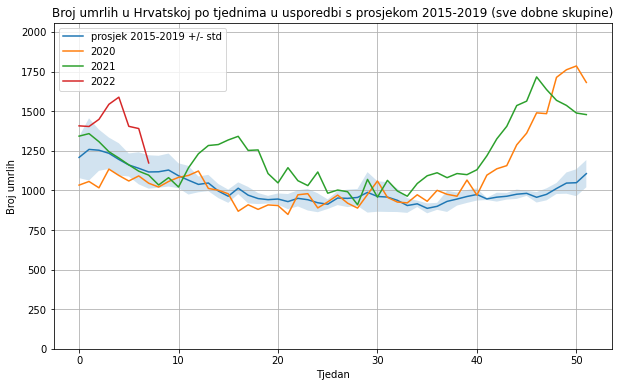

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(week_avgs, label='prosjek 2015-2019 +/- std')
ax.fill_between(range(len(week_avgs)), week_avgs - week_stds, week_avgs + week_stds, alpha=0.2)

ax.plot(per_week_2020, label='2020')
ax.plot(per_week_2021, label='2021')
ax.plot(per_week_2022, label='2022')

ax.set_ylim(0, max(week_avgs) + 800)
ax.grid('on')

ax.set_ylabel('Broj umrlih')
ax.set_xlabel('Tjedan')

ax.set_title('Broj umrlih u Hrvatskoj po tjednima u usporedbi s prosjekom 2015-2019 (sve dobne skupine)')
ax.legend()

plt.savefig('img/cro_excess.png', dpi=100, transparent=False, bbox_inches='tight', facecolor='white')

plt.show()

<ipython-input-15-509d0d0cc664>:54: RuntimeWarning: invalid value encountered in true_divide
  axs[r, c].fill_between(range(len(week_avgs)), - week_stds / week_stds,  week_stds / week_stds, alpha=0.2)
<ipython-input-15-509d0d0cc664>:56: RuntimeWarning: divide by zero encountered in true_divide
  axs[r, c].plot((per_week_2020 - week_avgs) / week_stds, label='2020')
<ipython-input-15-509d0d0cc664>:56: RuntimeWarning: invalid value encountered in true_divide
  axs[r, c].plot((per_week_2020 - week_avgs) / week_stds, label='2020')
<ipython-input-15-509d0d0cc664>:57: RuntimeWarning: divide by zero encountered in true_divide
  axs[r, c].plot((per_week_2021 - week_avgs) / week_stds, label='2021')
<ipython-input-15-509d0d0cc664>:57: RuntimeWarning: invalid value encountered in true_divide
  axs[r, c].plot((per_week_2021 - week_avgs) / week_stds, label='2021')
<ipython-input-15-509d0d0cc664>:54: RuntimeWarning: invalid value encountered in true_divide
  axs[r, c].fill_between(range(len(week_avgs

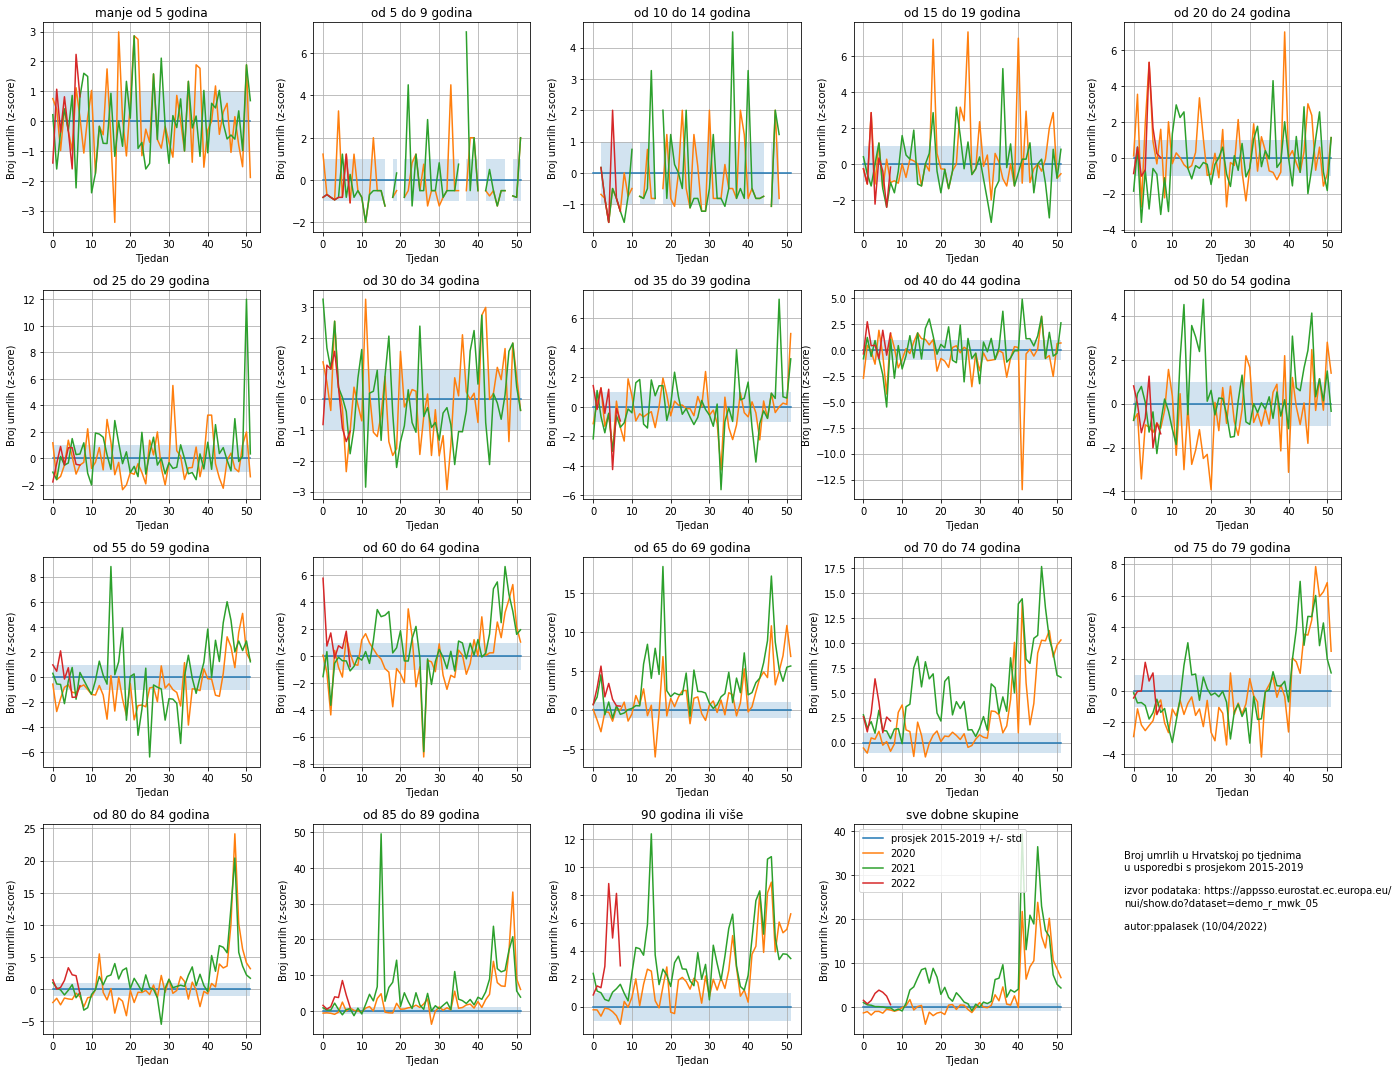

In [15]:
fig, axs = plt.subplots(4, 5, figsize=(20, 15))

for i, age_group in enumerate(sorted_age_groups):
    r = i // 5
    c = i % 5
    
    age_group_hr = age_group.replace('From', 'od').replace('to', 'do').replace('years', 'godina').replace('or over', 'ili više').replace('Less than', 'manje od').replace('Total', 'sve dobne skupine')

    data_current_age = data[(data.AGE == age_group) & (data.SEX == 'Total')]
    
    data_current_age_2015_2019 = data_current_age[(data_current_age.TIME >= '2015W01') & (data_current_age.TIME < '2020W01')]
    
    data_current_age_2020 = data_current_age[(data_current_age.TIME >= '2020W01') & (data_current_age.TIME < '2021W01')]
    data_current_age_2021 = data_current_age[(data_current_age.TIME >= '2021W01') & (data_current_age.TIME < '2022W01')]
    data_current_age_2022 = data_current_age[(data_current_age.TIME >= '2022W01') & (data_current_age.TIME < '2023W01')]
    
    week_avgs = []
    week_stds = []

    for week in range(1, 53):
        current_week = data_current_age_2015_2019[data_current_age_2015_2019.TIME.str.contains('W{}'.format(str(week).zfill(2)))]

        current_vals = np.asarray([int(x.replace(',', '')) for x in current_week.Value.to_list()])

        week_avgs.append(current_vals.mean())
        week_stds.append(current_vals.std())

    week_avgs = np.asarray(week_avgs)
    week_stds = np.asarray(week_stds)
    
    
    
    
    per_week_2020 = []
    per_week_2021 = []
    per_week_2022 = []

    for week in range(1, 53):
        current_week_2020 = data_current_age_2020[data_current_age_2020.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
        current_week_2021 = data_current_age_2021[data_current_age_2021.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
        current_week_2022 = data_current_age_2022[data_current_age_2022.TIME.str.contains('W{}'.format(str(week).zfill(2)))]

        per_week_2020.append(int(current_week_2020.Value.iat[0].replace(',', '')))
        per_week_2021.append(int(current_week_2021.Value.iat[0].replace(',', '')))

        try:
            per_week_2022.append(int(current_week_2022.Value.iat[0].replace(',', '')))
        except:
            pass
    
    

    axs[r, c].plot(week_avgs - week_avgs, label='prosjek 2015-2019 +/- std')
    axs[r, c].fill_between(range(len(week_avgs)), - week_stds / week_stds,  week_stds / week_stds, alpha=0.2)

    axs[r, c].plot((per_week_2020 - week_avgs) / week_stds, label='2020')
    axs[r, c].plot((per_week_2021 - week_avgs) / week_stds, label='2021')
    axs[r, c].plot((per_week_2022 - week_avgs[:len(per_week_2022)]) / week_stds[:len(per_week_2022)], label='2022')

    axs[r, c].grid('on')

    axs[r, c].set_ylabel('Broj umrlih (z-score)')
    axs[r, c].set_xlabel('Tjedan')

    axs[r, c].set_title(age_group_hr)
    
    
axs[r, c].legend()

axs[r, c + 1].text(0., 0.5, 'Broj umrlih u Hrvatskoj po tjednima\nu usporedbi s prosjekom 2015-2019\n\nizvor podataka: https://appsso.eurostat.ec.europa.eu/\nnui/show.do?dataset=demo_r_mwk_05\n\nautor:ppalasek (10/04/2022)')
axs[r, c + 1].axis('off')



plt.tight_layout()
plt.savefig('img/cro_excess_all_z_score.png', dpi=100, transparent=False, bbox_inches='tight', facecolor='white')


plt.show()

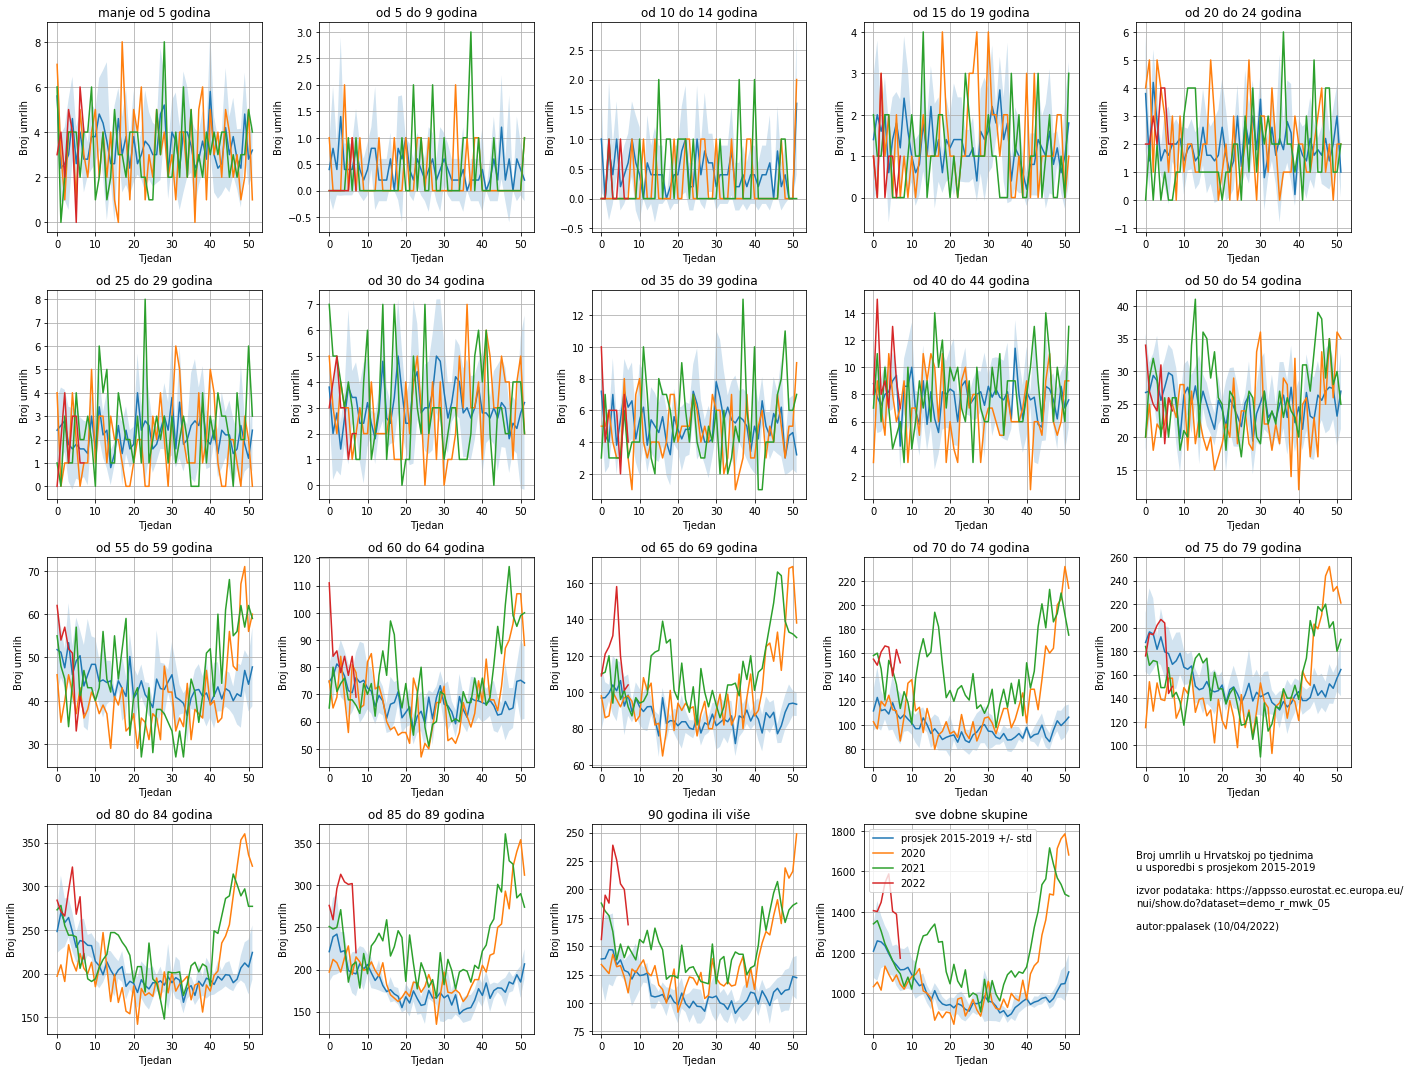

In [16]:
fig, axs = plt.subplots(4, 5, figsize=(20, 15))

for i, age_group in enumerate(sorted_age_groups):
    r = i // 5
    c = i % 5
    
    age_group_hr = age_group.replace('From', 'od').replace('to', 'do').replace('years', 'godina').replace('or over', 'ili više').replace('Less than', 'manje od').replace('Total', 'sve dobne skupine')

    data_current_age = data[(data.AGE == age_group) & (data.SEX == 'Total')]
    
    data_current_age_2015_2019 = data_current_age[(data_current_age.TIME >= '2015W01') & (data_current_age.TIME < '2020W01')]
    
    data_current_age_2020 = data_current_age[(data_current_age.TIME >= '2020W01') & (data_current_age.TIME < '2021W01')]
    data_current_age_2021 = data_current_age[(data_current_age.TIME >= '2021W01') & (data_current_age.TIME < '2022W01')]
    data_current_age_2022 = data_current_age[(data_current_age.TIME >= '2022W01') & (data_current_age.TIME < '2023W01')]
    
    week_avgs = []
    week_stds = []

    for week in range(1, 53):
        current_week = data_current_age_2015_2019[data_current_age_2015_2019.TIME.str.contains('W{}'.format(str(week).zfill(2)))]

        current_vals = np.asarray([int(x.replace(',', '')) for x in current_week.Value.to_list()])

        week_avgs.append(current_vals.mean())
        week_stds.append(current_vals.std())

    week_avgs = np.asarray(week_avgs)
    week_stds = np.asarray(week_stds)
    
    
    
    
    per_week_2020 = []
    per_week_2021 = []
    per_week_2022 = []

    for week in range(1, 53):
        current_week_2020 = data_current_age_2020[data_current_age_2020.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
        current_week_2021 = data_current_age_2021[data_current_age_2021.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
        current_week_2022 = data_current_age_2022[data_current_age_2022.TIME.str.contains('W{}'.format(str(week).zfill(2)))]

        per_week_2020.append(int(current_week_2020.Value.iat[0].replace(',', '')))
        per_week_2021.append(int(current_week_2021.Value.iat[0].replace(',', '')))

        try:
            per_week_2022.append(int(current_week_2022.Value.iat[0].replace(',', '')))
        except:
            pass
    
    

    axs[r, c].plot(week_avgs, label='prosjek 2015-2019 +/- std')
    axs[r, c].fill_between(range(len(week_avgs)), week_avgs- week_stds, week_avgs + week_stds, alpha=0.2)

    axs[r, c].plot(per_week_2020, label='2020')
    axs[r, c].plot(per_week_2021, label='2021')
    axs[r, c].plot(per_week_2022, label='2022')

    axs[r, c].grid('on')

    axs[r, c].set_ylabel('Broj umrlih')
    axs[r, c].set_xlabel('Tjedan')

    axs[r, c].set_title(age_group_hr)
    
    
axs[r, c].legend()

axs[r, c + 1].text(0., 0.5, 'Broj umrlih u Hrvatskoj po tjednima\nu usporedbi s prosjekom 2015-2019\n\nizvor podataka: https://appsso.eurostat.ec.europa.eu/\nnui/show.do?dataset=demo_r_mwk_05\n\nautor:ppalasek (10/04/2022)')
axs[r, c + 1].axis('off')

plt.tight_layout()

plt.savefig('img/cro_excess_all.png', dpi=100, transparent=False, bbox_inches='tight', facecolor='white')

plt.show()